In [1]:
#import packages
import numpy as np
import pandas as pd

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('./Dataset/BanksDataset/ICICIBANK.csv')

#print the head
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ICICIBANK,EQ,69.20,74.35,74.75,71.40,74.75,74.75,73.20,286260,2.095439e+12,NaN,NaN,NaN
1,2000-01-04,ICICIBANK,EQ,74.75,73.05,78.50,71.00,73.25,73.05,73.38,296264,2.173893e+12,NaN,NaN,NaN
2,2000-01-05,ICICIBANK,EQ,73.05,70.00,73.50,67.50,70.00,69.50,70.85,227624,1.612794e+12,NaN,NaN,NaN
3,2000-01-06,ICICIBANK,EQ,69.50,71.00,74.00,69.55,69.75,70.05,72.04,275149,1.982121e+12,NaN,NaN,NaN
4,2000-01-07,ICICIBANK,EQ,70.05,69.00,72.50,66.00,67.00,67.40,68.72,138809,9.538882e+11,NaN,NaN,NaN


In [2]:
df1 = df.reset_index()['Close']

In [3]:
df1.shape

(5097,)

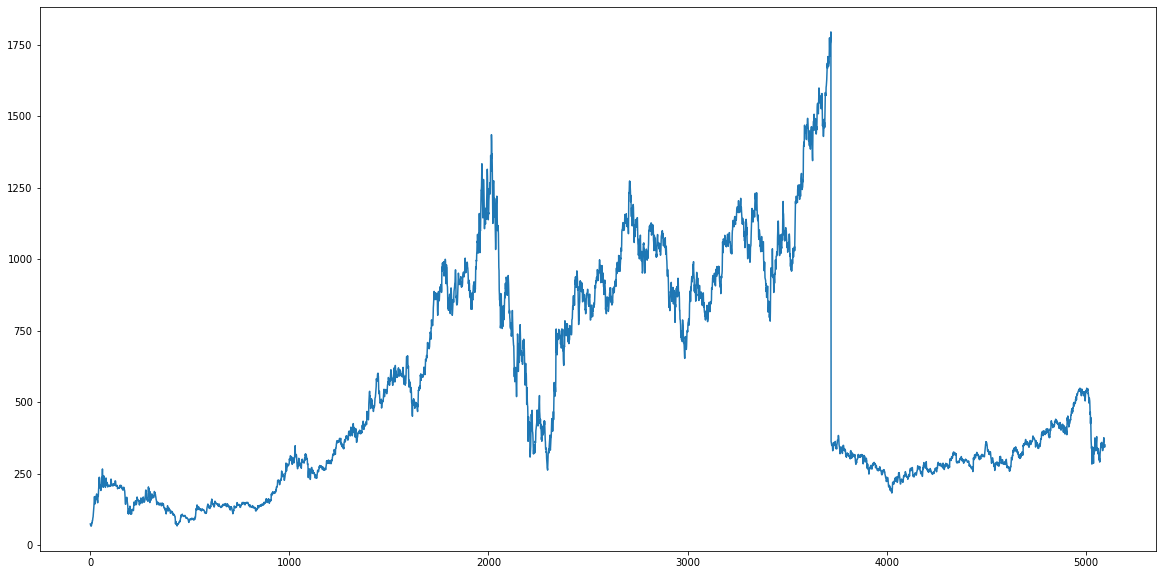

In [4]:
# Plotting the dataframe
plt.plot(df1)

In [5]:
df1= scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [6]:
df1

array([[0.00425667],
       [0.00327214],
       [0.00121619],
       ...,
       [0.16314357],
       [0.15966873],
       [0.16450455]])

In [7]:
df1.shape

(5097, 1)

In [8]:
# SPLITTING INTO TRAIN AND TEST
#deciding the split size
trainSize = int(len(df1)*0.65)
testSize= len(df1)- trainSize

#Making the splits
trainData, testData = df1[0:trainSize, :],df1[trainSize:len(df1), :1 ] 

In [9]:
len(trainData), len(testData)


(3313, 1784)

In [10]:
# Converting the array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY= [],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
time_step= 320
X_train, Y_train= create_dataset(trainData, time_step)
X_test, Y_test= create_dataset(testData, time_step)

In [12]:
print(X_train.shape)

(2992, 320)


In [13]:
print(Y_train.shape)

(2992,)


In [14]:
#Before going into LSTM, we have to make our data 3D
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1],1)


In [15]:
#Creating the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\330s\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\330s\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\330s\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\330s\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [16]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(320,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 320, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 320, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train, Y_train, validation_data= (X_test, Y_test), epochs= 15, batch_size=128, verbose=1)

Train on 2992 samples, validate on 1463 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/15
2992/2992 [==============================] - 46s 15ms/sample - loss: 0.0337 - val_loss: 0.0069
Epoch 2/15
2992/2992 [==============================] - 43s 14ms/sample - loss: 0.0025 - val_loss: 0.0040
Epoch 3/15
2992/2992 [==============================] - 44s 15ms/sample - loss: 0.0010 - val_loss: 0.0037
Epoch 4/15
2992/2992 [==============================] - 45s 15ms/sample - loss: 8.1112e-04 - val_loss: 0.0034
Epoch 5/15
2992/2992 [==============================] - 45s 15ms/sample - loss: 7.6185e-04 - val_loss: 0.0034
Epoch 6/15
2992/2992 [==============================] - 45s 15ms/sample - loss: 7.4775e-04 - val_loss: 0.0033
Epoch 7/15
2992/2992 [==============================] - 45s 15ms/sample - loss: 7.4445e-04 - val_loss: 0.0032
Epoch 8/15
2992/2992 [==============================] - 45s 15ms/sample - loss: 7.2709e-04 - val_los

In [19]:
import tensorflow as tf

#Doing the predictions
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

In [20]:
# transforming back to original , to perform RMSE
train_predict= scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [21]:
# Calculating RMSE Performance
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train, train_predict))


703.8936709631074

In [22]:
math.sqrt(mean_squared_error(Y_test, test_predict))

497.8025456693613

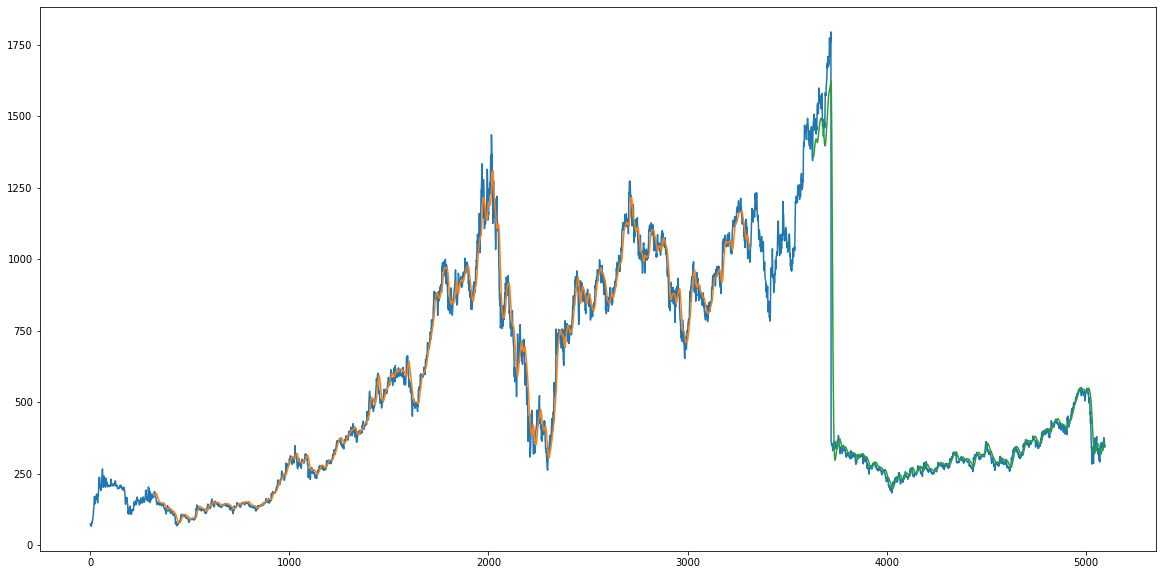

In [23]:
#Plotting the training and testing data
look_back= 320 #time stamp
#Training data
trainPredictPlot= np.empty_like(df1)
trainPredictPlot[:, :]= np.nan
trainPredictPlot[look_back: len(train_predict)+look_back, :]= train_predict

#Test Data
testPredictPlot= np.empty_like(df1)
testPredictPlot[:, :]= np.nan
testPredictPlot[len(train_predict)+(look_back*2) +1: len(df1) -1 , :]= test_predict

#Plotting the baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [24]:
len(testData)

1784

In [25]:
x_input=testData[1464:].reshape(1,-1)
x_input.shape

(1, 320)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [27]:
from numpy import array

lst_output=[]
n_steps=320
i=0
while(i<15):
    
    if(len(temp_input)>320):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16974469]
321
1 day input [0.18578792 0.18793073 0.18561418 0.18989981 0.19149244 0.19169514
 0.18850987 0.18787282 0.18306596 0.18920484 0.18868362 0.19294029
 0.19291133 0.19160827 0.19097122 0.18804656 0.18610645 0.1871489
 0.18515087 0.19097122 0.18926276 0.18685933 0.18949441 0.188423
 0.19667574 0.19516998 0.1894365  0.19059478 0.19325882 0.18995772
 0.19679157 0.19696531 0.19004459 0.19366421 0.19337465 0.18480338
 0.18231308 0.18184977 0.18399259 0.17889616 0.18127063 0.17933051
 0.18248682 0.18665663 0.19708114 0.19270863 0.19572016 0.19890543
 0.21100944 0.21318121 0.21248625 0.20611571 0.20779522 0.20634737
 0.20588406 0.20368333 0.19931082 0.20223548 0.20194591 0.20498639
 0.20304627 0.2039729  0.20290149 0.20084554 0.2054497  0.20408872
 0.21196502 0.21045926 0.20967742 0.2121098  0.2150055  0.21633752
 0.21410784 0.2152082  0.21390514 0.21344183 0.21358661 0.21367348
 0.20762147 0.20912724 0.21051717 0.20799792 0.20828748 0.20553657
 0.20686859 0.20692651 0.20342271 0.

4 day output [[0.17056972]]
5 day input [0.19149244 0.19169514 0.18850987 0.18787282 0.18306596 0.18920484
 0.18868362 0.19294029 0.19291133 0.19160827 0.19097122 0.18804656
 0.18610645 0.1871489  0.18515087 0.19097122 0.18926276 0.18685933
 0.18949441 0.188423   0.19667574 0.19516998 0.1894365  0.19059478
 0.19325882 0.18995772 0.19679157 0.19696531 0.19004459 0.19366421
 0.19337465 0.18480338 0.18231308 0.18184977 0.18399259 0.17889616
 0.18127063 0.17933051 0.18248682 0.18665663 0.19708114 0.19270863
 0.19572016 0.19890543 0.21100944 0.21318121 0.21248625 0.20611571
 0.20779522 0.20634737 0.20588406 0.20368333 0.19931082 0.20223548
 0.20194591 0.20498639 0.20304627 0.2039729  0.20290149 0.20084554
 0.2054497  0.20408872 0.21196502 0.21045926 0.20967742 0.2121098
 0.2150055  0.21633752 0.21410784 0.2152082  0.21390514 0.21344183
 0.21358661 0.21367348 0.20762147 0.20912724 0.21051717 0.20799792
 0.20828748 0.20553657 0.20686859 0.20692651 0.20342271 0.1985869
 0.19928187 0.19954248 0

8 day output [[0.17223956]]
9 day input [0.18306596 0.18920484 0.18868362 0.19294029 0.19291133 0.19160827
 0.19097122 0.18804656 0.18610645 0.1871489  0.18515087 0.19097122
 0.18926276 0.18685933 0.18949441 0.188423   0.19667574 0.19516998
 0.1894365  0.19059478 0.19325882 0.18995772 0.19679157 0.19696531
 0.19004459 0.19366421 0.19337465 0.18480338 0.18231308 0.18184977
 0.18399259 0.17889616 0.18127063 0.17933051 0.18248682 0.18665663
 0.19708114 0.19270863 0.19572016 0.19890543 0.21100944 0.21318121
 0.21248625 0.20611571 0.20779522 0.20634737 0.20588406 0.20368333
 0.19931082 0.20223548 0.20194591 0.20498639 0.20304627 0.2039729
 0.20290149 0.20084554 0.2054497  0.20408872 0.21196502 0.21045926
 0.20967742 0.2121098  0.2150055  0.21633752 0.21410784 0.2152082
 0.21390514 0.21344183 0.21358661 0.21367348 0.20762147 0.20912724
 0.21051717 0.20799792 0.20828748 0.20553657 0.20686859 0.20692651
 0.20342271 0.1985869  0.19928187 0.19954248 0.19754445 0.19783402
 0.20174321 0.20961951 0

12 day output [[0.17425913]]
13 day input [0.19291133 0.19160827 0.19097122 0.18804656 0.18610645 0.1871489
 0.18515087 0.19097122 0.18926276 0.18685933 0.18949441 0.188423
 0.19667574 0.19516998 0.1894365  0.19059478 0.19325882 0.18995772
 0.19679157 0.19696531 0.19004459 0.19366421 0.19337465 0.18480338
 0.18231308 0.18184977 0.18399259 0.17889616 0.18127063 0.17933051
 0.18248682 0.18665663 0.19708114 0.19270863 0.19572016 0.19890543
 0.21100944 0.21318121 0.21248625 0.20611571 0.20779522 0.20634737
 0.20588406 0.20368333 0.19931082 0.20223548 0.20194591 0.20498639
 0.20304627 0.2039729  0.20290149 0.20084554 0.2054497  0.20408872
 0.21196502 0.21045926 0.20967742 0.2121098  0.2150055  0.21633752
 0.21410784 0.2152082  0.21390514 0.21344183 0.21358661 0.21367348
 0.20762147 0.20912724 0.21051717 0.20799792 0.20828748 0.20553657
 0.20686859 0.20692651 0.20342271 0.1985869  0.19928187 0.19954248
 0.19754445 0.19783402 0.20174321 0.20961951 0.20730295 0.20686859
 0.20249609 0.19876064 

In [28]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [30]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)